IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [2]:
df=pd.read_csv("zomato.csv")


In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


UNDERSTAND EACH COLUMN

In [4]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

name: Name of the restaurant

online_order: Whether online ordering is available or not

book_table: Whether table booking is available or not

rate: Ratings

votes: Number of votes (integer)

approx_cost(for two people): Cost

listed_in(type): Type of listing.

GET THE INFORMATION OF COLUMNS AND NOTE THE OBSERVATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


OBSERVATION:

missing data: There is no missing data

datatype:rate dtyape to float

understand the data inside the dataframe using head()

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Data cleaning

1. check and remove duplicates

In [7]:
df.duplicated().any()

np.False_

observation: There is no duplicate data

2.handling the missing value

In [8]:
df.shape

(148, 7)

In [9]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

observation: No null values

DATA TRANSFORMATION

1.convert rate dtype to float

In [10]:
def fun(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(fun)

In [11]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


2.replace the 'Yes' by 1 in online_order and book_table column using map()

In [12]:
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})



In [13]:
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

3.Renaming the columns(name,approx_rate(for 2 people),rate,listed_in(type))

In [14]:
df=df.rename(columns={'name':'restaurant_name','rate':'ratings','approx_cost(for two people)':'approx_cost','listed_in(type)': 'dining_option'})
df.head(2)

,restaurant_name,online_order,book_table,ratings,votes,approx_cost,dining_option
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet


4.create a new column cost_category using cut()

In [15]:
df['cost_category']=pd.cut(df['approx_cost'],bins=[0,200,500,800],labels=['low','medium','high'])
df['cost_category']

0        high
1        high
2        high
3      medium
4        high
        ...  
143       low
144       low
145    medium
146      high
147       low
Name: cost_category, Length: 148, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [16]:
df.head()

,restaurant_name,online_order,book_table,ratings,votes,approx_cost,dining_option,cost_category
0,Jalsa,1,1,4.1,775,800,Buffet,high
1,Spice Elephant,1,0,4.1,787,800,Buffet,high
2,San Churro Cafe,1,0,3.8,918,800,Buffet,high
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet,medium
4,Grand Village,0,0,3.8,166,600,Buffet,high


5.change the order of the columns

In [17]:
df.shape

(148, 8)

In [18]:
df=df[df.columns[[0,3,4,1,2,5,7,6]]] 

df.head(10)

,restaurant_name,ratings,votes,online_order,book_table,approx_cost,cost_category,dining_option
0,Jalsa,4.1,775,1,1,800,high,Buffet
1,Spice Elephant,4.1,787,1,0,800,high,Buffet
2,San Churro Cafe,3.8,918,1,0,800,high,Buffet
3,Addhuri Udupi Bhojana,3.7,88,0,0,300,medium,Buffet
4,Grand Village,3.8,166,0,0,600,high,Buffet
5,Timepass Dinner,3.8,286,1,0,600,high,Buffet
6,Rosewood International Hotel - Bar & Restaurant,3.6,8,0,0,800,high,Buffet
7,Onesta,4.6,2556,1,1,600,high,Cafes
8,Penthouse Cafe,4.0,324,1,0,700,high,other
9,Smacznego,4.2,504,1,0,550,high,Cafes


ZOMATO Dataset-Questions

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   restaurant_name  148 non-null    object  
 1   ratings          148 non-null    float64 
 2   votes            148 non-null    int64   
 3   online_order     148 non-null    int64   
 4   book_table       148 non-null    int64   
 5   approx_cost      148 non-null    int64   
 6   cost_category    143 non-null    category
 7   dining_option    148 non-null    object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 8.5+ KB


1.Find the restaurants that are not allow online orders

In [20]:
df[df['online_order'] == 1]

,restaurant_name,ratings,votes,online_order,book_table,approx_cost,cost_category,dining_option
0,Jalsa,4.1,775,1,1,800,high,Buffet
1,Spice Elephant,4.1,787,1,0,800,high,Buffet
2,San Churro Cafe,3.8,918,1,0,800,high,Buffet
5,Timepass Dinner,3.8,286,1,0,600,high,Buffet
7,Onesta,4.6,2556,1,1,600,high,Cafes
8,Penthouse Cafe,4.0,324,1,0,700,high,other
9,Smacznego,4.2,504,1,0,550,high,Cafes
10,Village Café,4.1,402,1,0,500,medium,Cafes
11,Cafe Shuffle,4.2,150,1,1,600,high,Cafes
12,The Coffee Shack,4.2,164,1,1,500,medium,Cafes


In [21]:
print(df['online_order'].unique())

[1 0]


In [22]:
df['online_order'].value_counts()

online_order
0    90
1    58
Name: count, dtype: int64

2.Display restaurants with a rating above 4.0

In [23]:
df[df['ratings'] > 4.0]

,restaurant_name,ratings,votes,online_order,book_table,approx_cost,cost_category,dining_option
0,Jalsa,4.1,775,1,1,800,high,Buffet
1,Spice Elephant,4.1,787,1,0,800,high,Buffet
7,Onesta,4.6,2556,1,1,600,high,Cafes
9,Smacznego,4.2,504,1,0,550,high,Cafes
10,Village Café,4.1,402,1,0,500,medium,Cafes
11,Cafe Shuffle,4.2,150,1,1,600,high,Cafes
12,The Coffee Shack,4.2,164,1,1,500,medium,Cafes
34,Faasos,4.2,415,1,0,500,medium,other
37,Szechuan Dragon,4.2,1647,1,0,600,high,Dining
38,Empire Restaurant,4.4,4884,1,0,750,high,other


3.how many resturants allow table booking

In [24]:
df[df['book_table'] == 1].shape[0]

8

4.Get the average rating of restaurants by dining_options

In [25]:
d=df.groupby('dining_option')
d['ratings'].mean()

dining_option
Buffet    3.842857
Cafes     3.765217
Dining    3.571818
other     3.912500
Name: ratings, dtype: float64

5.Count the no. of restaurants in each cost category

In [26]:
pd.pivot_table(df,index=['cost_category'],values='restaurant_name',aggfunc='count').rename(columns={'restaurant_name': 'restaurant_count'})

C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_18712\652751041.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,index=['cost_category'],values='restaurant_name',aggfunc='count').rename(columns={'restaurant_name': 'restaurant_count'})


,restaurant_count
cost_category,
low,38
medium,67
high,38


6.Find the top 5 restaurants with the highest votes

In [27]:
df.sort_values(by='votes', ascending=False).head()

,restaurant_name,ratings,votes,online_order,book_table,approx_cost,cost_category,dining_option
38,Empire Restaurant,4.4,4884,1,0,750,high,other
86,Meghana Foods,4.4,4401,1,0,600,high,Dining
7,Onesta,4.6,2556,1,1,600,high,Cafes
44,Onesta,4.6,2556,1,1,600,high,other
65,Kabab Magic,4.1,1720,1,0,400,medium,Dining


7.Find restaurants with a cost less than 500 and rating of 4.0 or more

In [28]:
df[(df['approx_cost'] < 500) & (df['ratings'] >= 4.0)]


,restaurant_name,ratings,votes,online_order,book_table,approx_cost,cost_category,dining_option
13,Caf-Eleven,4.0,424,0,0,450,medium,Cafes
39,Maruthi Davangere Benne Dosa,4.0,17,1,0,150,low,Dining
47,Recipe,4.0,804,1,0,450,medium,Dining
51,Shree Cool Point,4.1,28,1,0,150,low,Dining
52,Corner House Ice Cream,4.3,345,0,0,400,medium,Dining
54,Roving Feast,4.0,1047,0,0,450,medium,Dining
65,Kabab Magic,4.1,1720,1,0,400,medium,Dining
71,The Biryani Cafe,4.1,520,0,0,300,medium,Dining
72,Spicy Tandoor,4.1,0,0,0,150,low,Dining
76,Sri Guru Kottureshwara Davangere Benne Dosa,4.1,558,1,0,150,low,Dining


8. find the most common type dining option

In [29]:
df['dining_option'].mode()[0]


'Dining'

9.get restaurants  details that offer both online order and table booking

In [30]:
df[(df['online_order'] == 1) & (df['book_table'] == 1)]

,restaurant_name,ratings,votes,online_order,book_table,approx_cost,cost_category,dining_option
0,Jalsa,4.1,775,1,1,800,high,Buffet
7,Onesta,4.6,2556,1,1,600,high,Cafes
11,Cafe Shuffle,4.2,150,1,1,600,high,Cafes
12,The Coffee Shack,4.2,164,1,1,500,medium,Cafes
44,Onesta,4.6,2556,1,1,600,high,other
57,Wamama,4.2,354,1,1,800,high,other
61,Goa 0 Km,3.6,163,1,1,800,high,Dining


10.find the most common restaurant name

In [31]:
df['restaurant_name'].value_counts().idxmax()


'San Churro Cafe'


11.Group restaurants by cost category and calculate average rating

In [32]:
df.groupby('cost_category')['ratings'].mean()

C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_18712\641706177.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cost_category')['ratings'].mean()


cost_category
low       3.513158
medium    3.601493
high      3.810526
Name: ratings, dtype: float64

12.get the dining option which has the lowest average votes

In [33]:
g=df.groupby('dining_option')
g['votes'].mean().idxmin()


'Dining'

13.show restaurant details where name contains 'Cafe'

In [34]:
df[df['restaurant_name'].str.contains("Cafe", case=False)]

,restaurant_name,ratings,votes,online_order,book_table,approx_cost,cost_category,dining_option
2,San Churro Cafe,3.8,918,1,0,800,high,Buffet
8,Penthouse Cafe,4.0,324,1,0,700,high,other
11,Cafe Shuffle,4.2,150,1,1,600,high,Cafes
14,San Churro Cafe,3.8,918,1,0,800,high,Cafes
15,Cafe Vivacity,3.8,90,1,0,650,high,Cafes
18,T3H Cafe,3.9,93,0,0,300,medium,Cafes
19,360 Atoms Restaurant And Cafe,3.1,13,1,0,400,medium,Cafes
20,The Vintage Cafe,3.0,62,1,0,400,medium,Cafes
22,Cafe Coffee Day,3.6,28,0,0,900,NaN,Cafes
24,Hide Out Cafe,3.7,31,0,0,300,medium,Cafes


14. correlation b/w votes and ratings

In [35]:
correlation = df['votes'].corr(df['ratings'])
correlation

np.float64(0.48984428790988793)

15.average votes between restaurants with and without table booking.

In [36]:
df.groupby('book_table')['votes'].mean()


book_table
0    226.185714
1    940.750000
Name: votes, dtype: float64

                           ANALYSIS USING PLOTS

1. Count of Restaurants by dining options

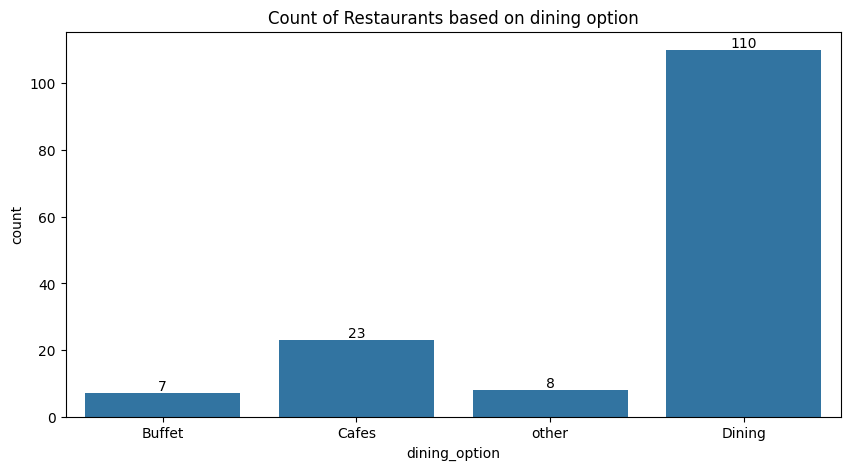

In [37]:
plt.figure(figsize=(10,5))
c=sns.countplot(data=df, x='dining_option')
c.bar_label(c.containers[0])
plt.title('Count of Restaurants based on dining option')
plt.show()

Observation:

--> Dining restaurants are preferred by a large no. of individuals.

2.Distribution of ratings

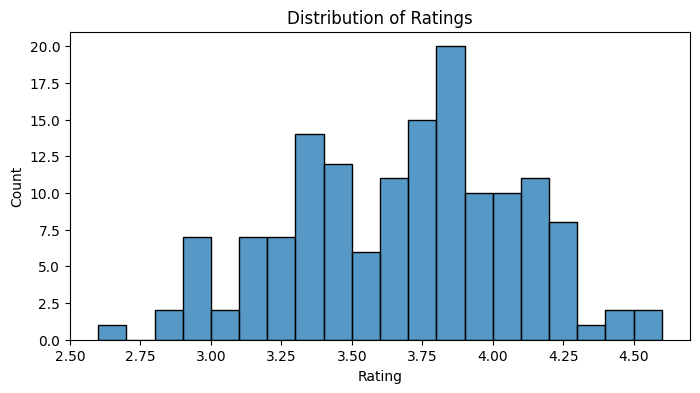

In [38]:
plt.figure(figsize=(8,4))
sns.histplot(df['ratings'],bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

Observation:

--> The majority of restaurants received ratings from 3.25 to


3.Online order availability

([<matplotlib.axis.XTick at 0x160e7031950>,
 [Text(0, 0, 'not available'), Text(1, 0, 'available')])

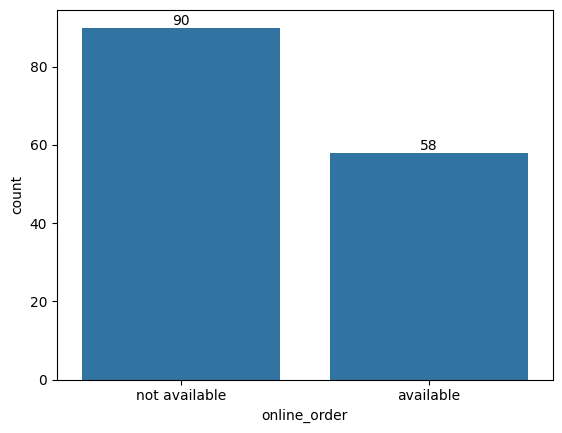

In [39]:
c=sns.countplot(x=df['online_order'])
c.bar_label(c.containers[0])
plt.xticks(ticks=(0,1),labels=('not available','available'))

observations:

--> majority of the restauants do not accept online orders.

4.Relationship b/w Ratings and votes

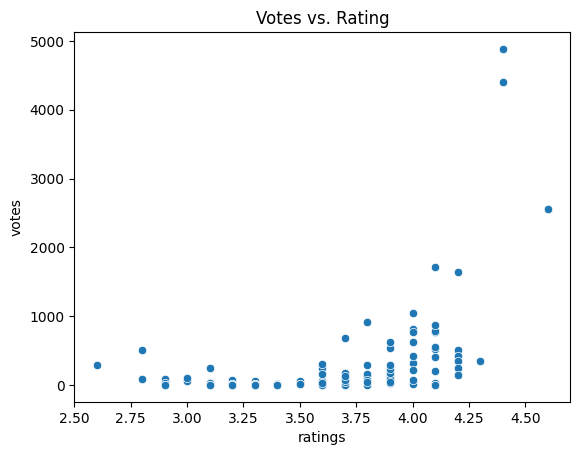

In [40]:
sns.scatterplot(x='ratings', y='votes', data=df)
plt.title('Votes vs. Rating')
plt.show()

Observation:

--> Most of the restaurants are rated from 3.5-4.2 range.

--> restaurants with high ratings have more votes.

--> As the rating increases,no.of votes also increases.

--> few restaurants with high votes(3000-5000) and rating from 4.2-4.5





5.Cost category count

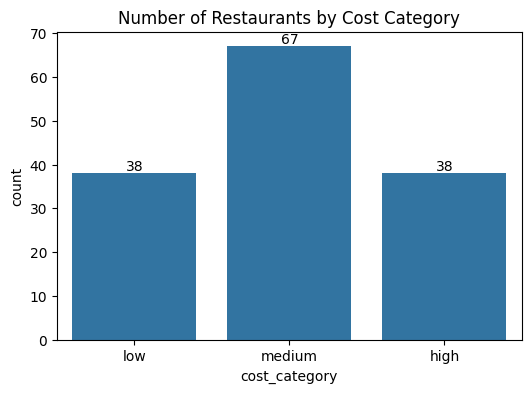

In [41]:
plt.figure(figsize=(6,4))
c=sns.countplot(data=df, x='cost_category', order=['low', 'medium', 'high'])
c.bar_label(c.containers[0])
plt.title('Number of Restaurants by Cost Category')
plt.show()


Observation:

--> Medium cost restaurants are most common.

--> From this we can say,customers have more options in the medium price range

6. Approximate cost for people

<Axes: xlabel='approx_cost', ylabel='count'>

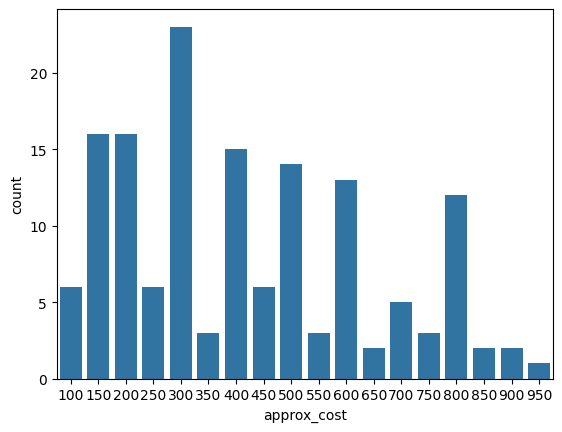

In [42]:

sns.countplot(x=df['approx_cost'])
# c.bar_label(c.containers[0])
# plt.show()

observations:

-->  majority o people prefer restaurants with an approx_cost of 300 rupees

7.Boxplot of Ratings by Cost Category

<Axes: xlabel='cost_category', ylabel='ratings'>

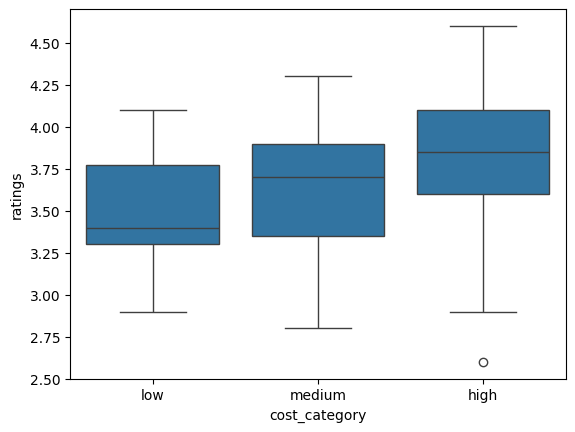

In [43]:
sns.boxplot(x='cost_category', y='ratings', data=df)

Observation:

--> High-cost restaurants have the highest ratings.

--> Rating increases with cost category.

--> few outliers are present in the high cost_category.

reasons:

--few customers may give low ratings for high cost restaurant due to bad service/food

--customers expect more form the high cost restaurants,because of this small issues can lead to low ratings




8.  impact of online ordering on restaurant ratings

<Axes: xlabel='online_order', ylabel='ratings'>

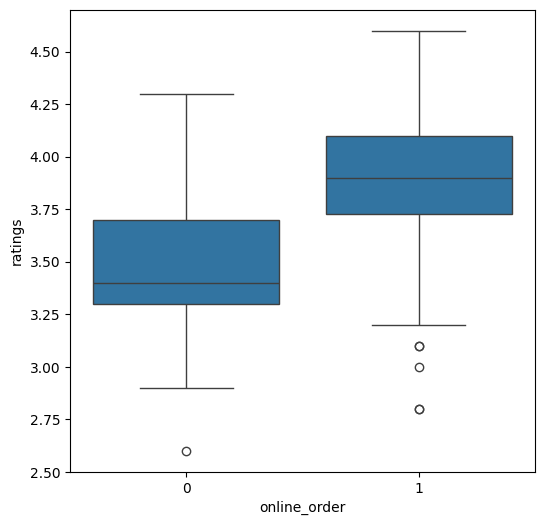

In [44]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='ratings', data=df)


Observation:

--> The plot compares ratings for two groups based on the online_order variable:

0 = No online order option

1 = Online order available

--> Median rating is higher for restaurants offering online orders than for those without.

--> The interquartile range (IQR) is smaller for the online-order group, indicating less variation in ratings.

--> Restaurants without online orders (0) have a wider spread of ratings, showing more inconsistency in customer satisfaction.

--> A few outliers are present in both groups, but more noticeably for the online order = 1 group (on the lower side).

--> The overall distribution suggests that offering an online order option is generally associated with higher customer ratings






9.Heatmap of Correlation Matrix

<Axes: >

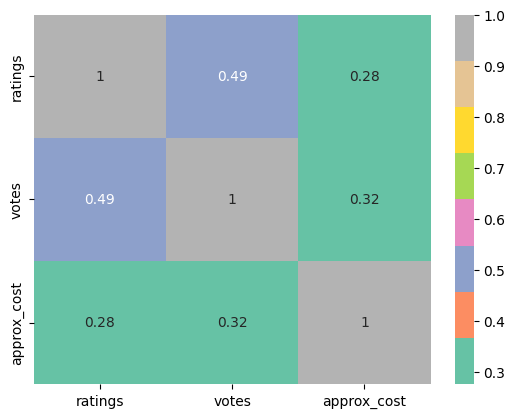

In [45]:
sns.heatmap(df[['ratings', 'votes', 'approx_cost']].corr(), annot=True, cmap='Set2')

Observation:

--> The heatmap shows correlations among three variables: ratings, votes, and approx_cost.

--> Ratings and votes have a moderate positive correlation (0.49) — higher-rated restaurants tend to receive more votes.

--> Ratings and approx_cost show a weak positive correlation (0.28) — more expensive restaurants slightly tend to have better ratings.

--> Votes and approx_cost also have a weak positive correlation (0.32) — costlier restaurants tend to get more votes, possibly because they attract more customers or have higher visibility.

--> No strong negative correlations are observed, indicating that these variables generally move in the same direction.

--> Overall, ratings, votes, and cost are positively related, but the strength of relationships is moderate to weak.



                                                             Final Analysis

-->Most restaurants do not support online ordering or table booking.

-->dining type and medium cost restaurants are most common.

-->higher ratings correlate with more votes.

-->costlier restaurants  have better ratings.

-->top-voted restaurants are filtered based on high rating and low cost.

-->dining-type restaurants are having high customer preference.

from visual analysis

-->Plots showed medium-cost dining is preferred

-->positive correlation between ratings and votes; restaurants with table booking get slightly more votes on average

